## Hyperparameter Optimization For Xgboost using RandomizedSearchCV

In [ ]:
import pandas as pd

In [ ]:
## Read the Dataset

df=pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

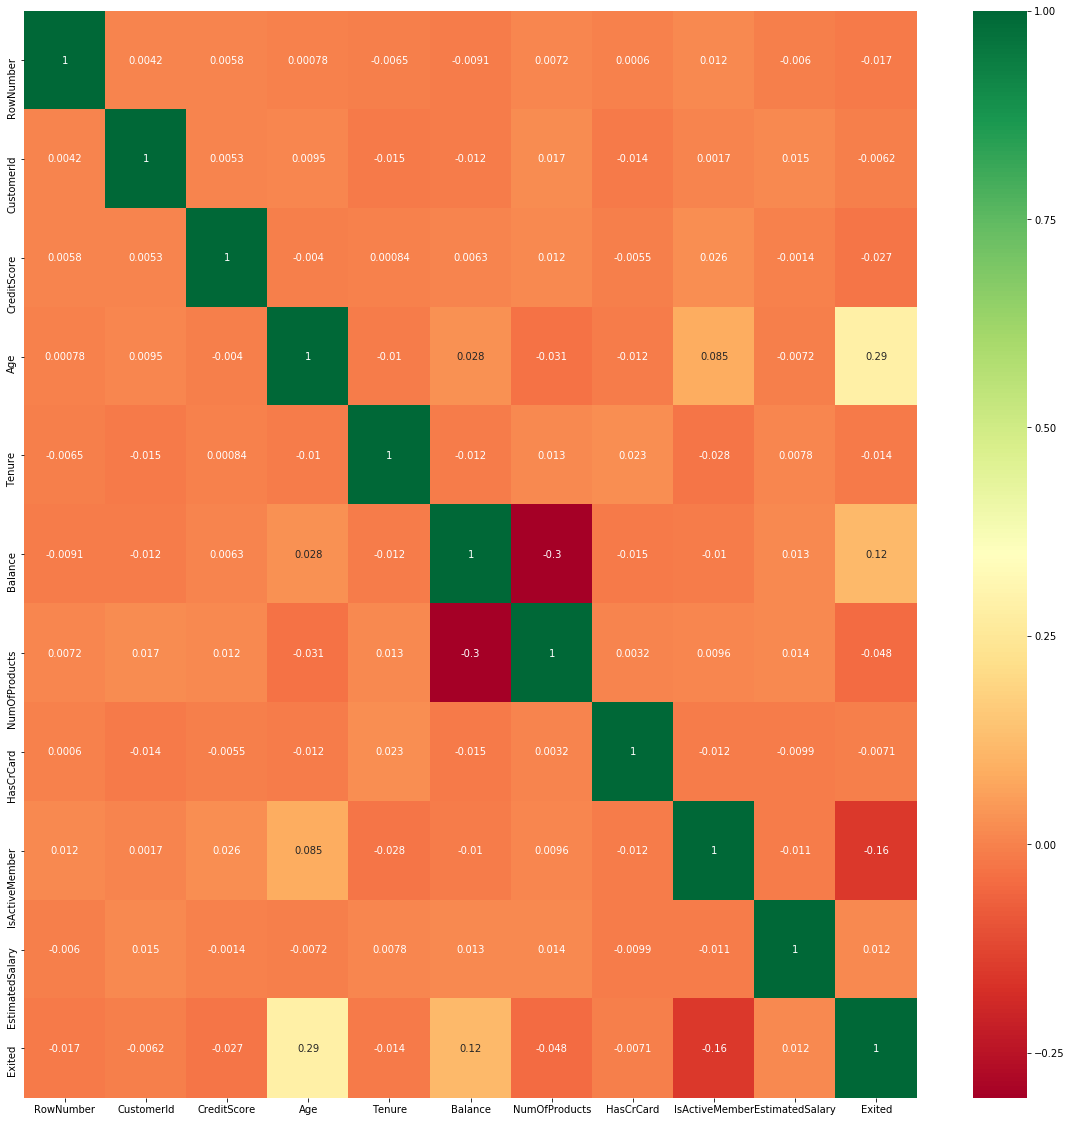

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Get the Independent and Dependent Features
X=df.iloc[:,3:13]
Y=df.iloc[:,13]

In [ ]:
geography=pd.get_dummies(X['Geography'],drop_first=True)

In [ ]:
geography.head()

Germany  Spain
0        0      0
1        0      1
2        0      0
3        0      0
4        0      1

In [ ]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
gender.head()

Male
0     0
1     0
2     0
3     0
4     0

In [ ]:
## Drop Categorical Features
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  
0               1        101348.88  
1               1        112542.58  
2               0        113931.57  
3               0         93826.63  
4               1         79084.10

In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0               1        101348.88        0      0     0  
1               1        112542.58        0      1     0  
2               0        113931.57        0      0     0  
3               0         93826.63        0      0     0  
4               1         79084.10        0      1     0

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    5.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.7s finished



 Time taken: 0 hours 0 minutes and 6.18 seconds.


In [ ]:
X.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0               1        101348.88        0      0     0  
1               1        112542.58        0      1     0  
2               0        113931.57        0      0     0  
3               0         93826.63        0      0     0  
4               1         79084.10        0      1     0

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)

In [ ]:
score

array([0.87012987, 0.86613387, 0.87012987, 0.867     , 0.862     ,
       0.852     , 0.864     , 0.87887888, 0.85885886, 0.85785786])

In [ ]:
score.mean()

0.8646989201989201

In [4]:
!apt-get install -y protobuf-compiler python3-pil python3-lxml python3-pip python3-dev git



Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  python-pip-whl python3-asn1crypto python3-bs4 python3-cffi-backend
  python3-chardet python3-crypto python3-cryptography python3-html5lib
  python3-idna python3-keyring python3-keyrings.alt python3-olefile
  python3-pkg-resources python3-secretstorage python3-setuptools python3-six
  python3-webencodings python3-wheel python3-xdg
Suggested packages:
  gettext-base git-daemon-run | git-daemon-sysvinit git-doc git-el git-email
  git-gui gitk gitweb git-cvs git-mediawiki git-svn python-crypto-doc
  python-cryptography-doc python3-cryptography-vectors python3-genshi
  gnome-keyring libkf5wallet-bin gir1.2-gnomekeyring-1.0 python3-lxml-dbg
  python-lxml-doc python-pil-doc python3

In [3]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

In [6]:
!pip3 install -U pip

     |████████████████████████████████| 1.5MB 4.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [8]:
!python3 -m pip install Flask==1.1.1 WTForms==2.2.1 Flask_WTF==0.14.2 Werkzeug==0.16.0 tensorflow==2.0.0

     |████████████████████████████████| 94 kB 1.7 MB/s 
     |████████████████████████████████| 166 kB 8.0 MB/s 
     |████████████████████████████████| 327 kB 6.9 MB/s 
     |████████████████████████████████| 86.3 MB 20 kB/s 
     |████████████████████████████████| 3.8 MB 58.1 MB/s 
     |████████████████████████████████| 449 kB 38.6 MB/s 
     |████████████████████████████████| 50 kB 5.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7538 sha256=dea6f6d406618366a259eb04ff7b6773afaa013e9ba3663766c15302328bc580
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 1.0.1
    Uninstalling Werkzeug-1.0.1:
      Successfully uninstalled Werkzeug-1.0.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfu

In [9]:
cd /opt

/opt


In [11]:
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 53687 (delta 16), reused 18 (delta 1), pack-reused 53654
Receiving objects: 100% (53687/53687), 569.69 MiB | 27.63 MiB/s, done.
Resolving deltas: 100% (36883/36883), done.


In [12]:
cd models/research

/opt/models/research


In [14]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
cd $HOME
git clone https://github.com/GoogleCloudPlatform/tensorflow-object-detection-example
cp -a tensorflow-object-detection-example/object_detection_app_p3 /opt/
chmod u+x /opt/object_detection_app_p3/app.py
cp /opt/object_detection_app_p3/object-detection.service /etc/systemd/system/


In [15]:
cd $HOME

[Errno 2] No such file or directory: '$HOME'
/opt/models/research


In [20]:
cd home

/home


In [21]:
!git clone https://github.com/GoogleCloudPlatform/tensorflow-object-detection-example

Cloning into 'tensorflow-object-detection-example'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 83 (delta 14), reused 12 (delta 4), pack-reused 53
Unpacking objects: 100% (83/83), done.


In [22]:
cp -a tensorflow-object-detection-example/object_detection_app_p3 /opt/

In [24]:
!chmod u+x /opt/object_detection_app_p3/app.py

In [25]:
cp /opt/object_detection_app_p3/object-detection.service /etc/systemd/system/

In [27]:
cd tensorflow-object-detection-example/

/home/tensorflow-object-detection-example


In [28]:
ls

docs/  LICENSE  object_detection_app/  object_detection_app_p3/  README.md


In [29]:
cd object_detection_app_p3/

/home/tensorflow-object-detection-example/object_detection_app_p3


In [30]:
ls

app.py  decorator.py  object-detection.service  templates/


In [33]:
!systemctl daemon-reload



System has not been booted with systemd as init system (PID 1). Can't operate.


In [34]:
!systemctl enable object-detection

#systemctl status object-detection

Created symlink /etc/systemd/system/multi-user.target.wants/object-detection.service → /etc/systemd/system/object-detection.service.


In [44]:
!systemctl start object-detection

System has not been booted with systemd as init system (PID 1). Can't operate.


In [38]:
!service redis-server start

redis-server: unrecognized service


In [43]:
!service --status-all

 [ - ]  dbus
 [ ? ]  hwclock.sh
 [ ? ]  kmod
 [ - ]  procps
 [ - ]  rsync
 [ + ]  udev
 [ - ]  x11-common


In [42]:
!/etc/init.d/redis start

/bin/bash: /etc/init.d/redis: No such file or directory
